**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection & Analysis**

In [2]:
# loading the data 
df = pd.read_csv('insurance.csv')

In [3]:
# for  first 5 rows of dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Cateforical Features:**
**SEX** 
**SMOKER**
**REGION**

In [7]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Analysis**

In [8]:
# statistical Mesures of the dataset
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hjha8\AppData\Local\Temp\ipykernel_5560\3713106186.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

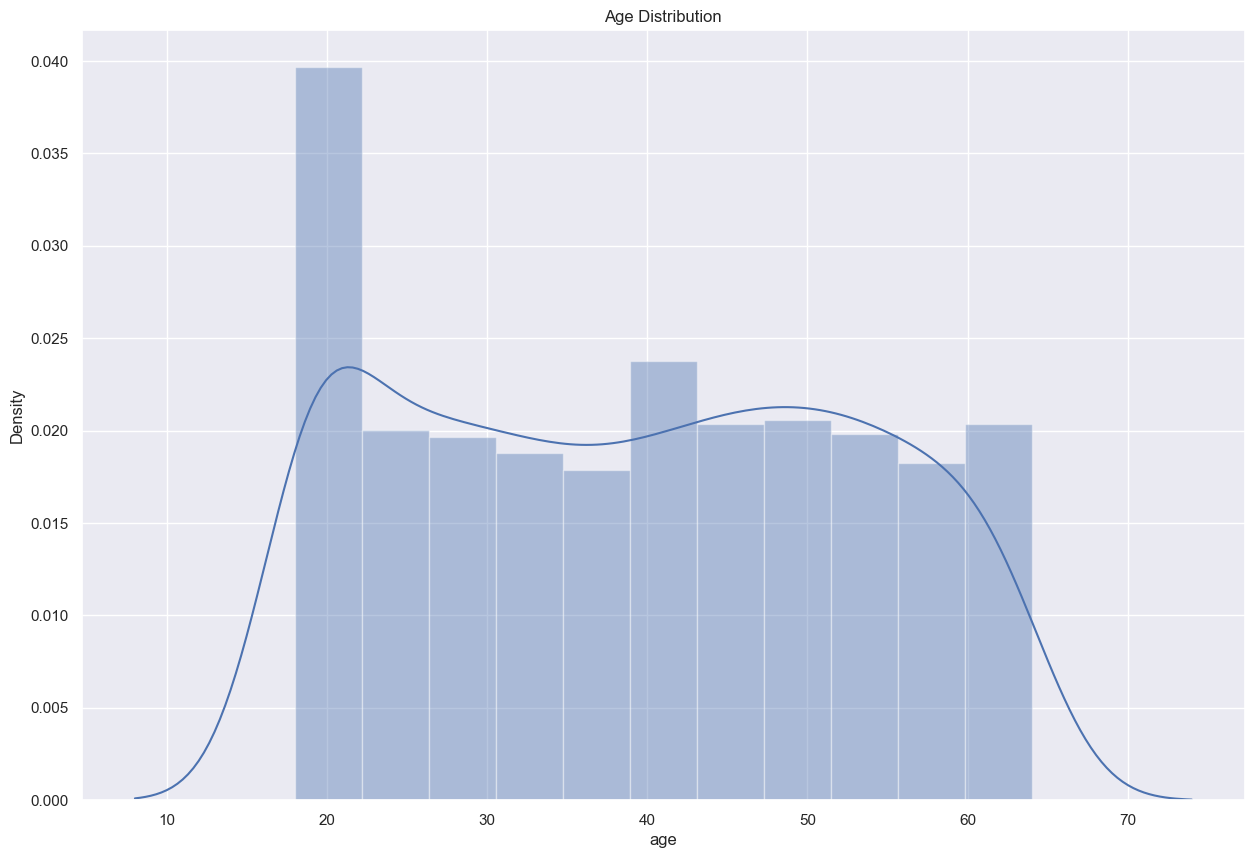

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(15,10))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

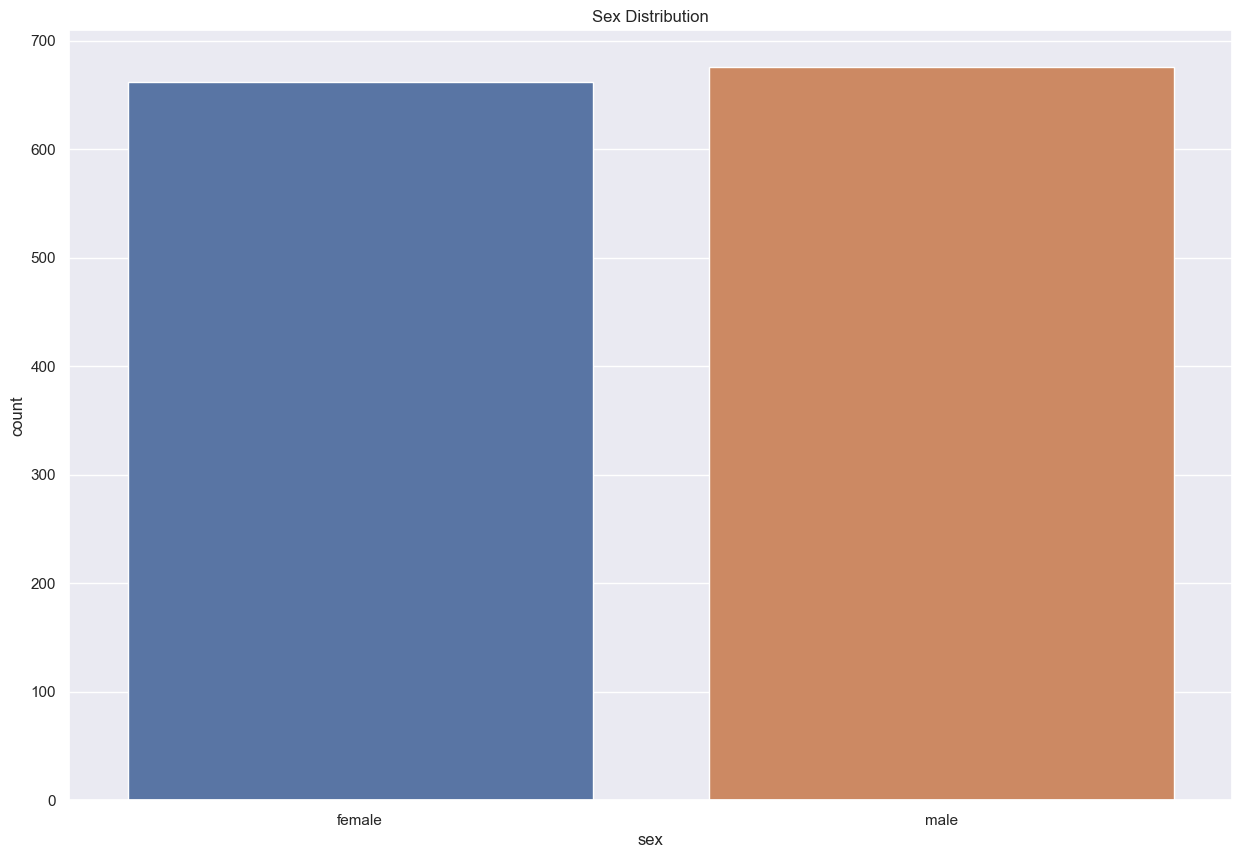

In [10]:
# Gender Column
plt.figure(figsize=(15,10))
sns.countplot(x = 'sex', data=df)
plt.title('Sex Distribution')
plt.show

In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\hjha8\AppData\Local\Temp\ipykernel_5560\3181138370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<function matplotlib.pyplot.show(close=None, block=None)>

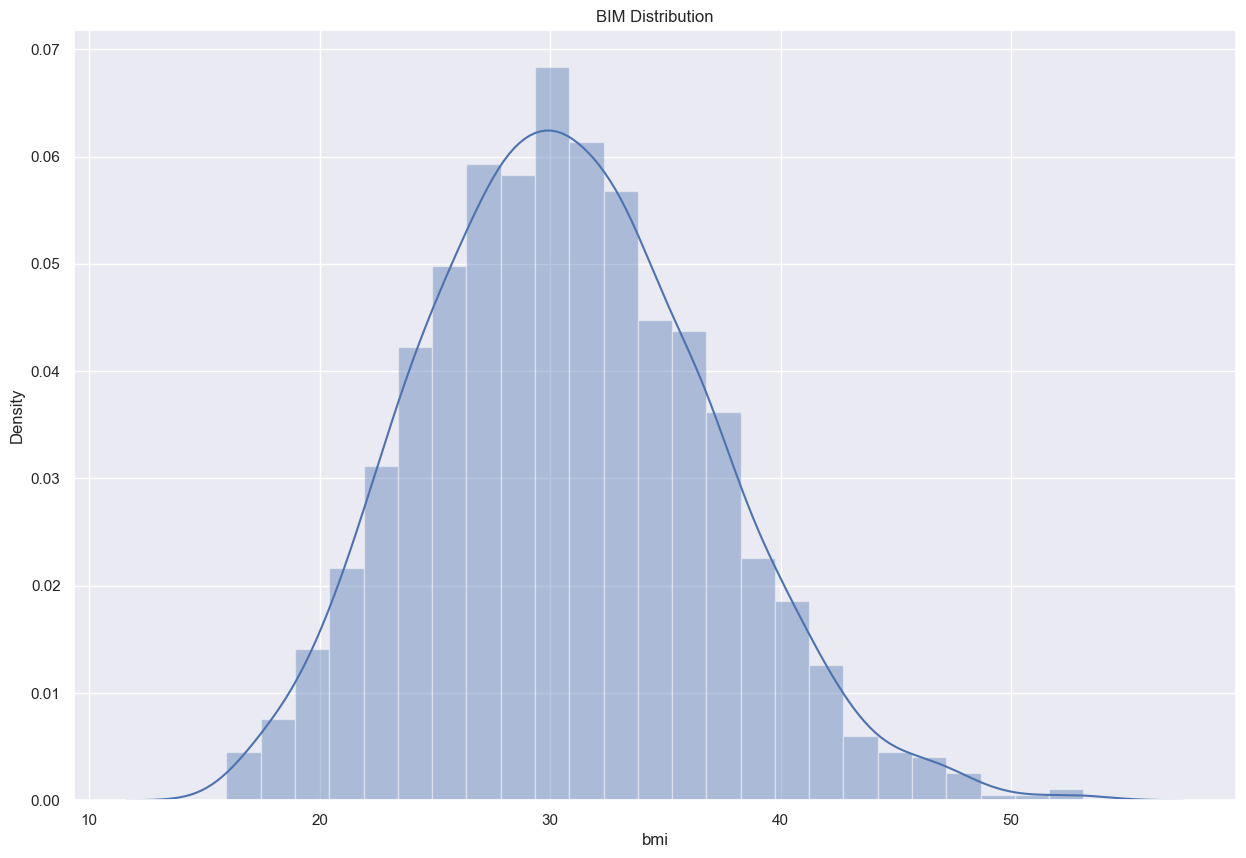

In [12]:
# bmi distribution
plt.figure(figsize=(15,10))
sns.distplot(df['bmi'])
plt.title('BIM Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

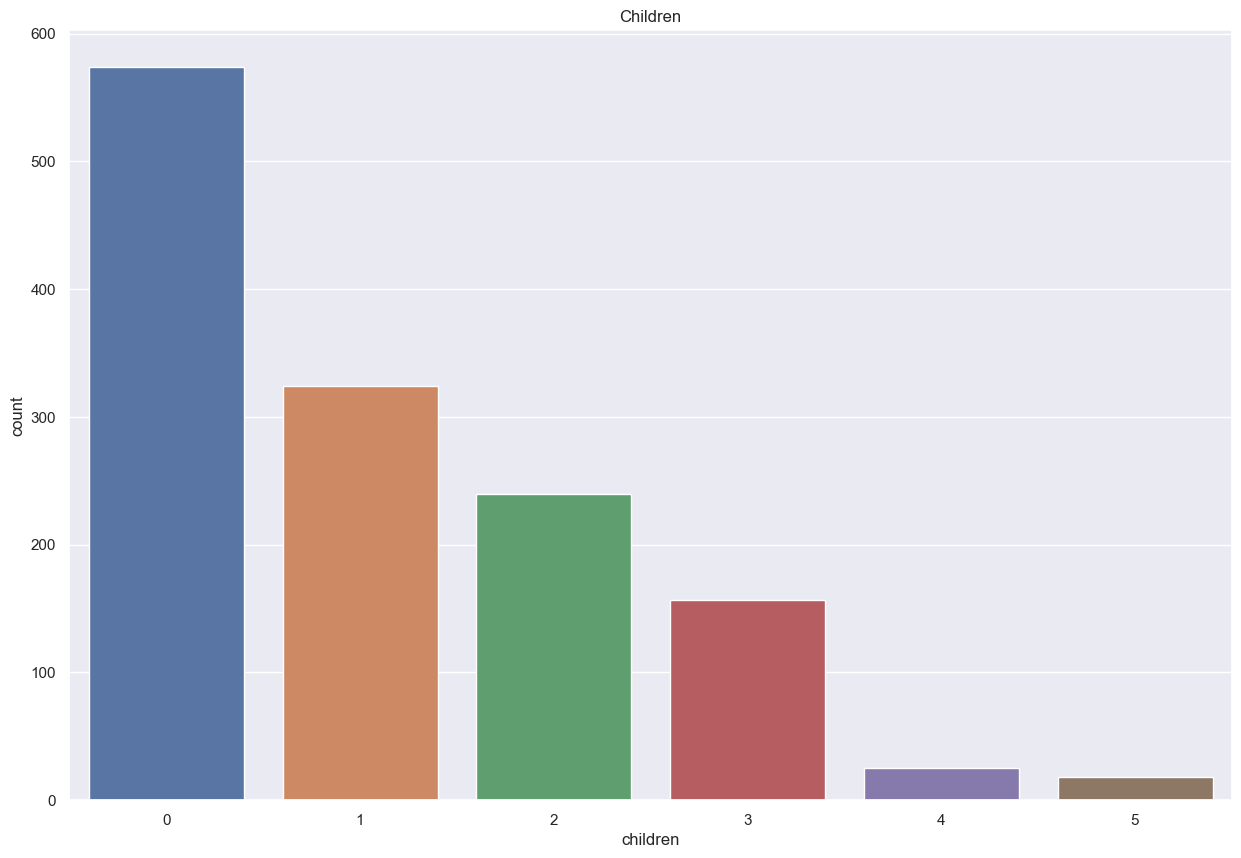

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='children' , data= df)
plt.title('Children')
plt.show

In [14]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

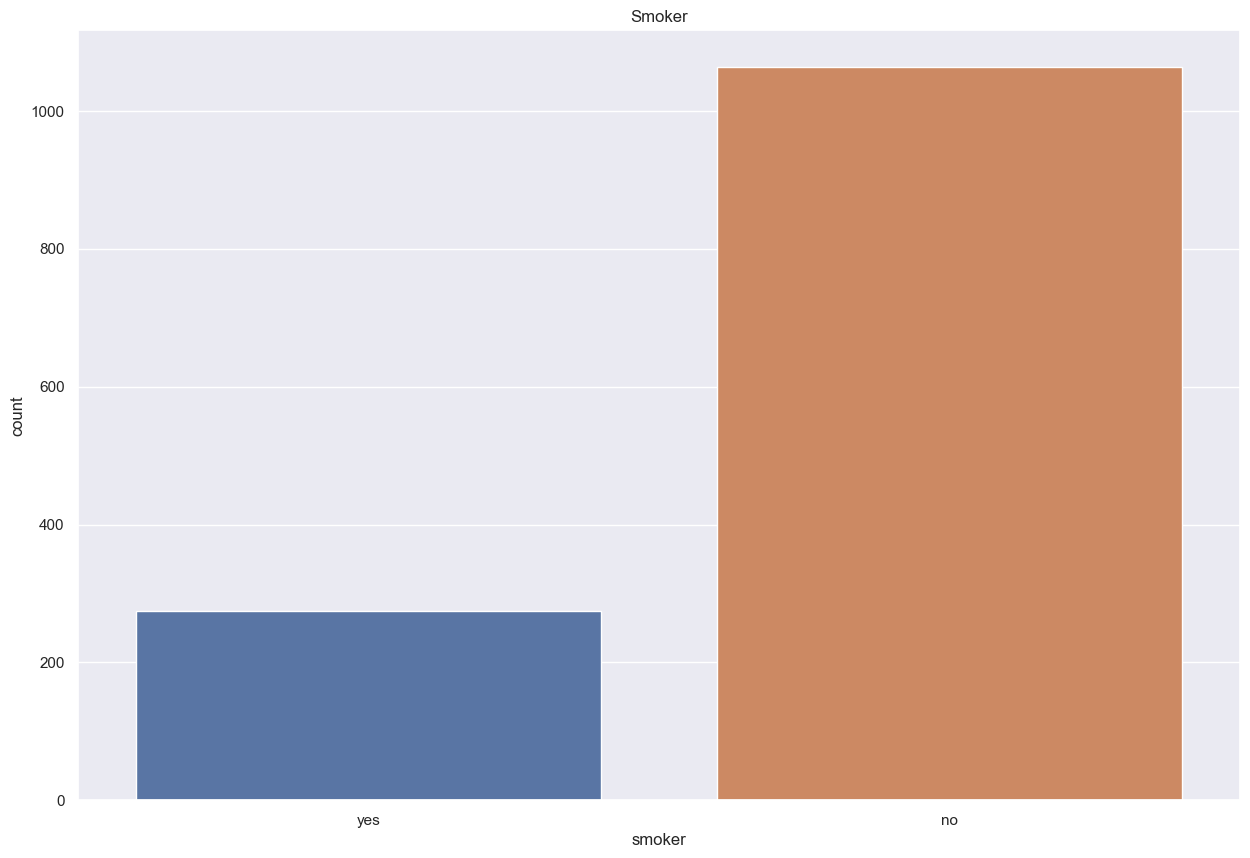

In [15]:
# for smoker
plt.figure(figsize=(15,10))
sns.countplot(x='smoker' , data= df)
plt.title('Smoker')
plt.show

C:\Users\hjha8\AppData\Local\Temp\ipykernel_5560\604826444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<function matplotlib.pyplot.show(close=None, block=None)>

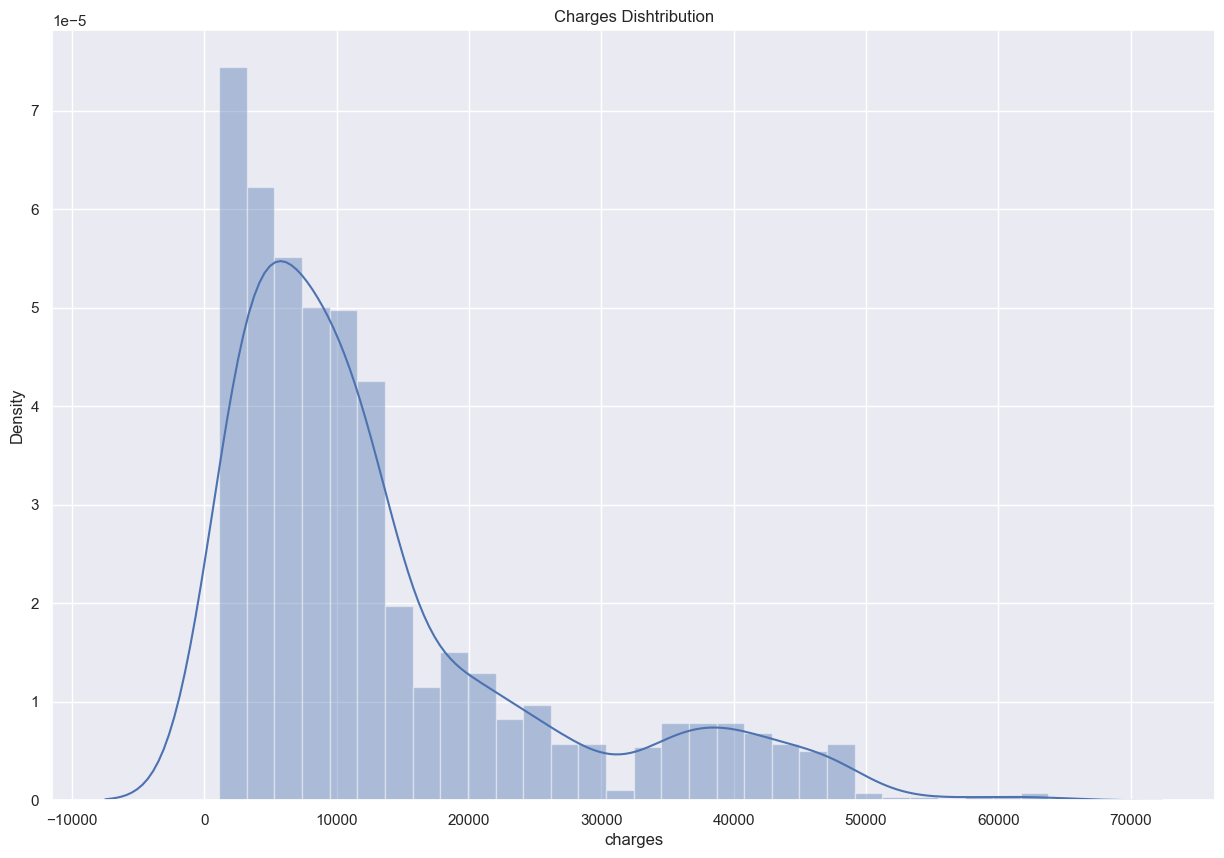

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(df['charges'])
plt.title('Charges Dishtribution')
plt.show

**Data PreProcessing**

Encoding the categorical features

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace = True )
# encoding smoker
df.replace({'smoker':{'yes':1,'no':0}}, inplace = True)
# encoding the region
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}, inplace= True)                    

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


**splitting Features and Target**

In [20]:
X = df.drop(columns='charges' , axis=1)
Y = df['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Splitting the data into Traing data & Testing Data**

In [23]:
X_train , X_test, Y_train,Y_test= train_test_split(X,Y , test_size=0.2 ,random_state=2)

In [24]:
X_train.head()

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,0,3
505,37,0,30.875,3,0,2
798,58,1,33.100,0,0,1
792,22,1,23.180,0,0,3
201,48,1,32.230,1,0,0


In [25]:
X_test.head()

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,0,3
1091,55,1,29.830,0,0,3
273,50,0,27.455,1,0,3
270,18,0,29.370,1,0,0
874,44,0,21.850,3,0,3


In [26]:
Y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [27]:
Y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

In [28]:
print(X.shape , X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**MODEL TRAINING**

**Linear Regression**

In [29]:
#loading the Linear Regression
lr = LinearRegression()

In [30]:
lr.fit(X_train, Y_train)

LinearRegression()

**MODEL EVALUATION**

In [31]:
#prediction on training data
training_data_prediction = lr.predict(X_train)

In [32]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value',r2_train)

R squared value 0.7518195459072954


In [33]:
training_data_prediction2 = lr.predict(X_test)

In [34]:
r2_test = metrics.r2_score(Y_test, training_data_prediction2)
print('R squared value',r2_test)

R squared value 0.7454471618659975


**BUILDING A PREDICTIVE SYSTEM**

In [35]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27559.89117926]
The insurance cost is USD  27559.89117926215


C:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [37]:
input_data = (31,0,25.74,5,1,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[31308.79774318]
The insurance cost is USD  31308.797743177667


C:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
